In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
%matplotlib inline
plt.style.use('fivethirtyeight')

# Train Set

In [64]:
df=pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

## Data Preprocessing

In [65]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


#### Showing the shape of the dataset

In [66]:
df.shape

(58645, 13)

#### Removing unwanted columns

In [67]:
df.drop('id', axis=1, inplace=True)

#### Showing the shape of the dataset after removing the 'id' column.

In [68]:
df.shape

(58645, 12)

#### Showing the information of the dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


#### Showing the null values of the dataset

In [70]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

#### Showing the duplicated values of the dataset

In [71]:
df.duplicated().sum()

0

#### Showing the extra statistical measures of the dataset

In [72]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


#### Showing the extra statistical measures of the dataset including categorical columns also

In [73]:
df.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645,58645.000000,58645,58645,58645.000000,58645.000000,58645.000000,58645,58645.000000,58645.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,N,NaN,NaN
freq,NaN,NaN,30594,NaN,12271,20984,NaN,NaN,NaN,49943,NaN,NaN
mean,27.550857,6.404617e+04,NaN,4.701015,NaN,NaN,9217.556518,10.677874,0.159238,NaN,5.813556,0.142382
std,6.033216,3.793111e+04,NaN,3.959784,NaN,NaN,5563.807384,3.034697,0.091692,NaN,4.029196,0.349445
min,20.000000,4.200000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,NaN,2.000000,0.000000
25%,23.000000,4.200000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,0.000000
50%,26.000000,5.800000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,0.000000
75%,30.000000,7.560000e+04,NaN,7.000000,NaN,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,0.000000


#### Showing the unique values of the dataset

In [74]:
df.nunique()

person_age                      53
person_income                 2641
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      545
loan_int_rate                  362
loan_percent_income             61
cb_person_default_on_file        2
cb_person_cred_hist_length      29
loan_status                      2
dtype: int64

-------------------

# Exploratory Data Analysis

## 1) Distribution of the dataset

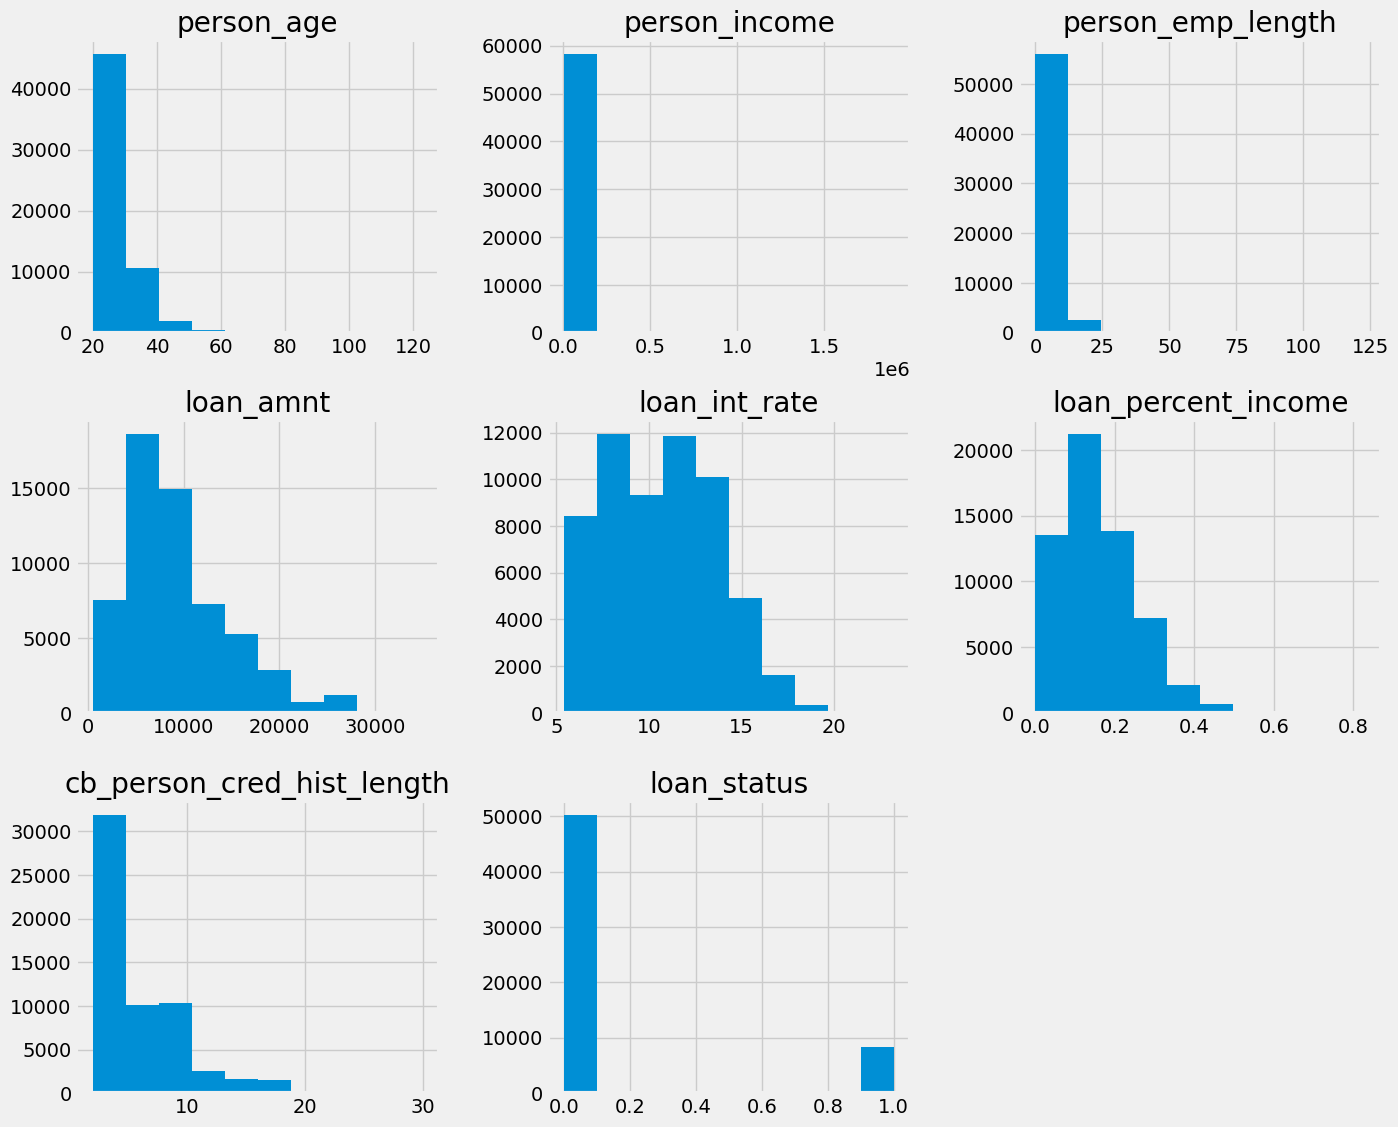

In [75]:
df.hist(figsize=(15,13))

plt.show()

-------------------

## 2) Shwoing the Labeled column of the dataset

<Axes: xlabel='loan_status', ylabel='count'>

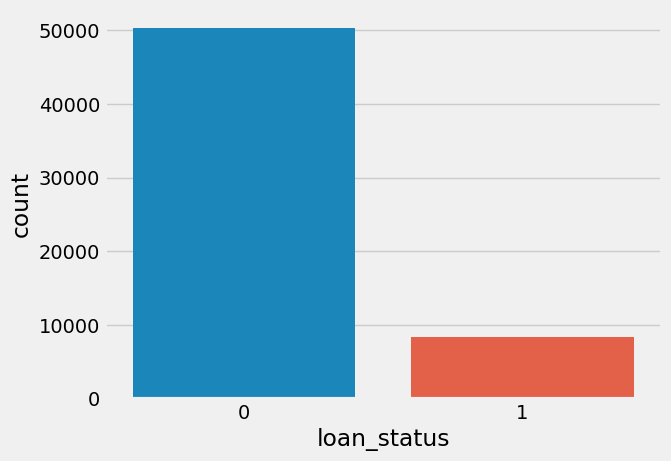

In [76]:
sn.countplot(x='loan_status', data=df)

---------------

## 3) Showing the Numerical columns and then performing analysis

In [77]:
num_cols=df.select_dtypes(include=['int64','float64']).columns

num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')

### i) Visualizing the Numerical columns using Distribution plot and Box plot

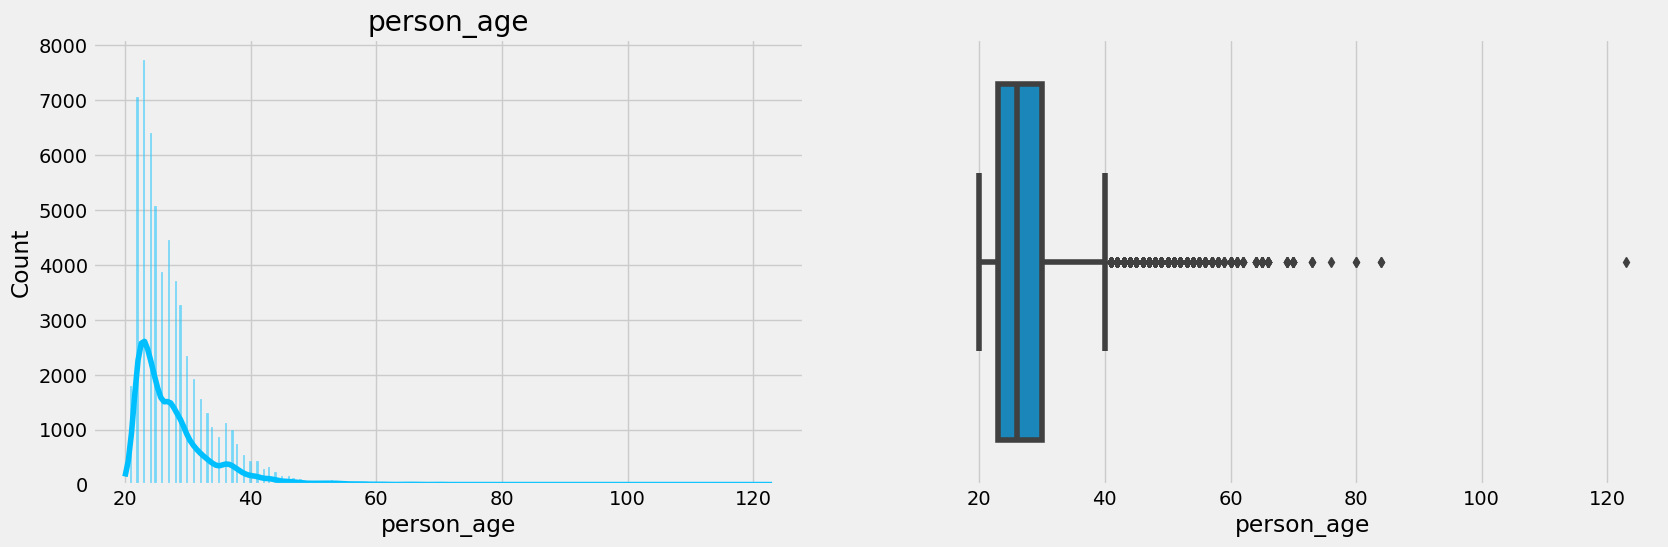

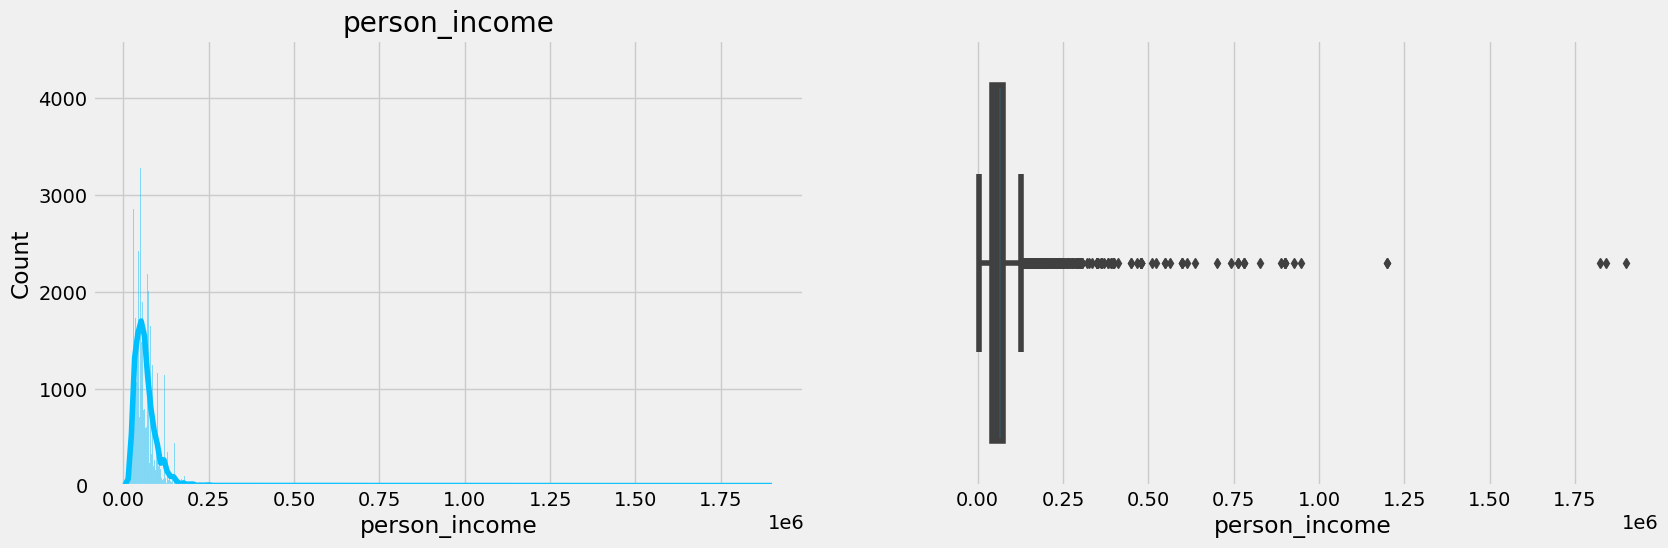

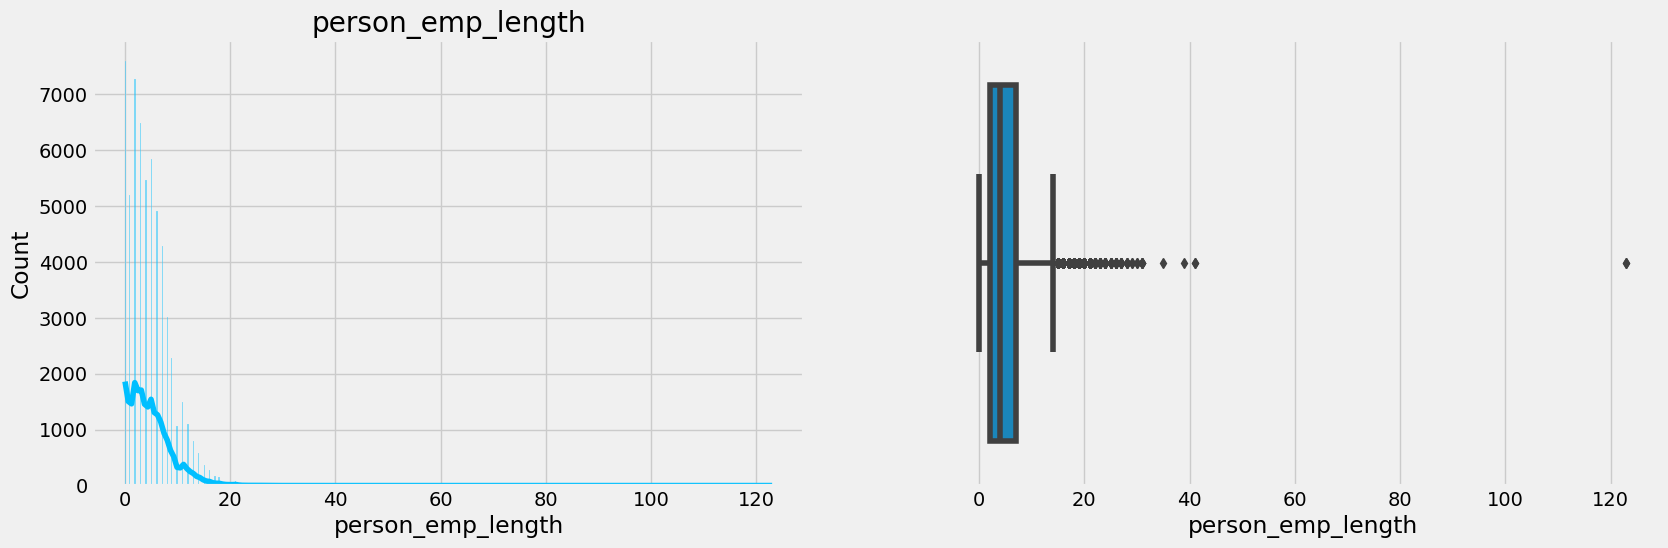

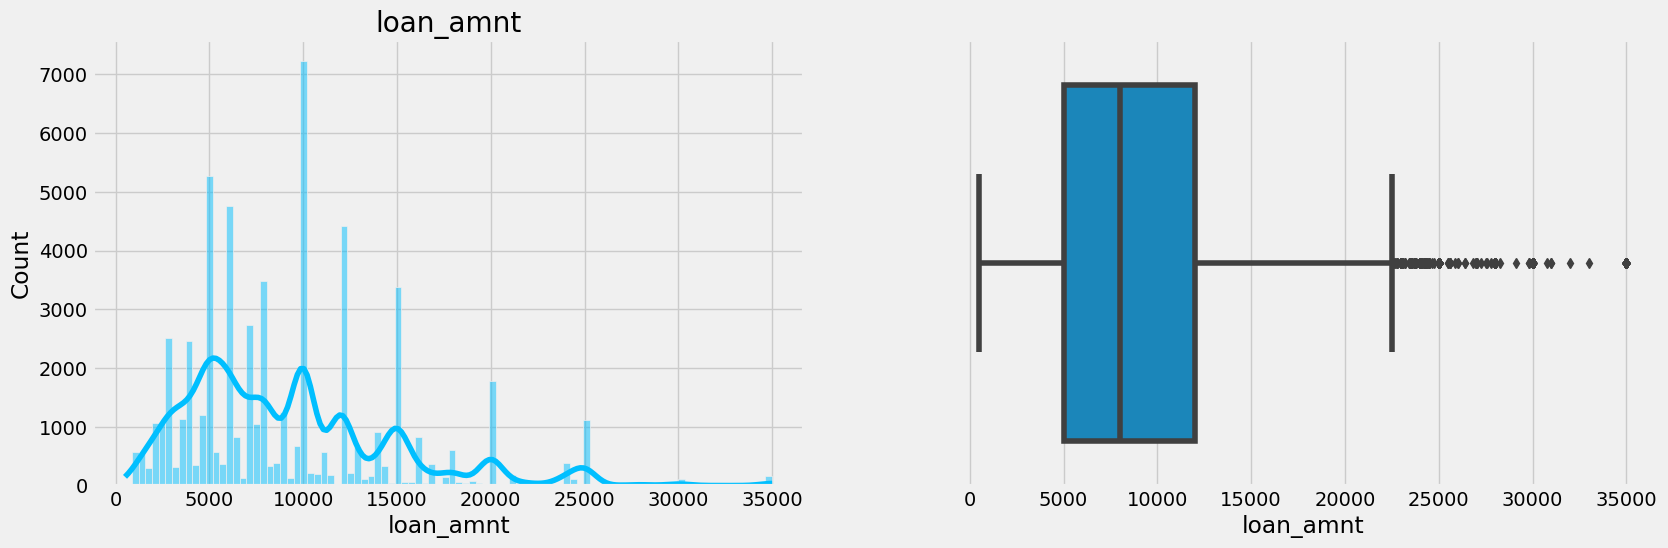

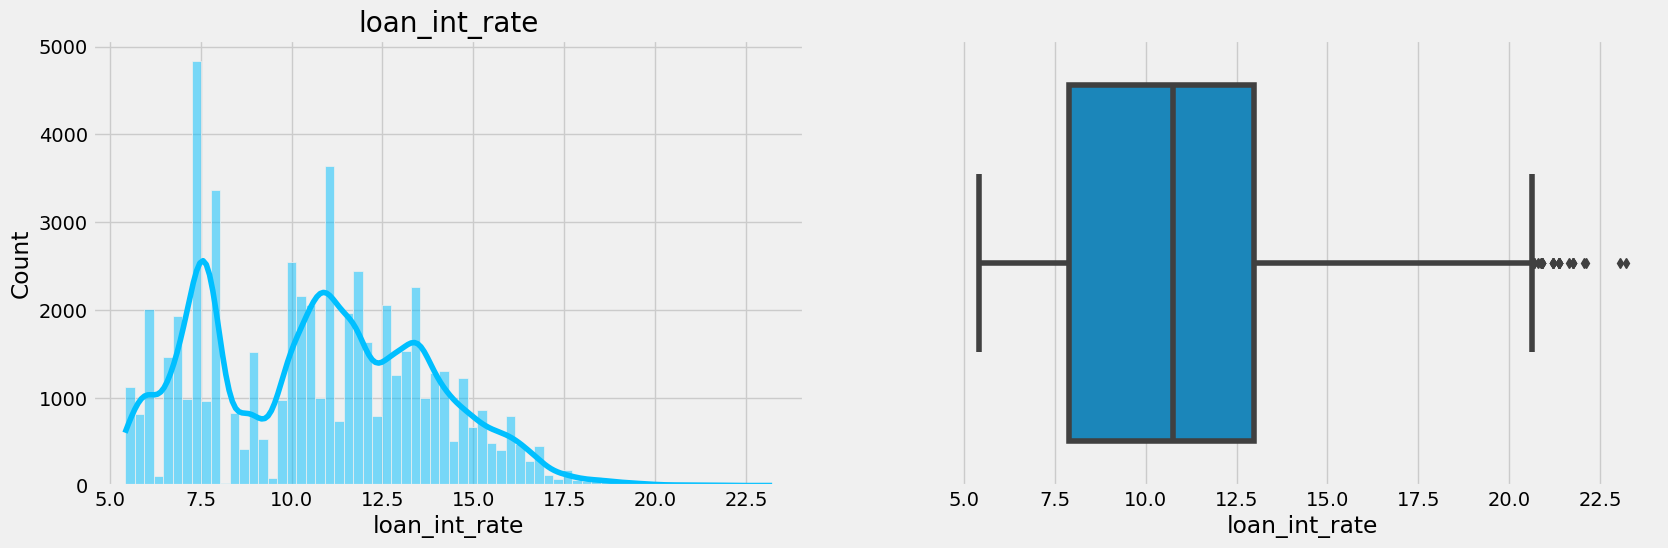

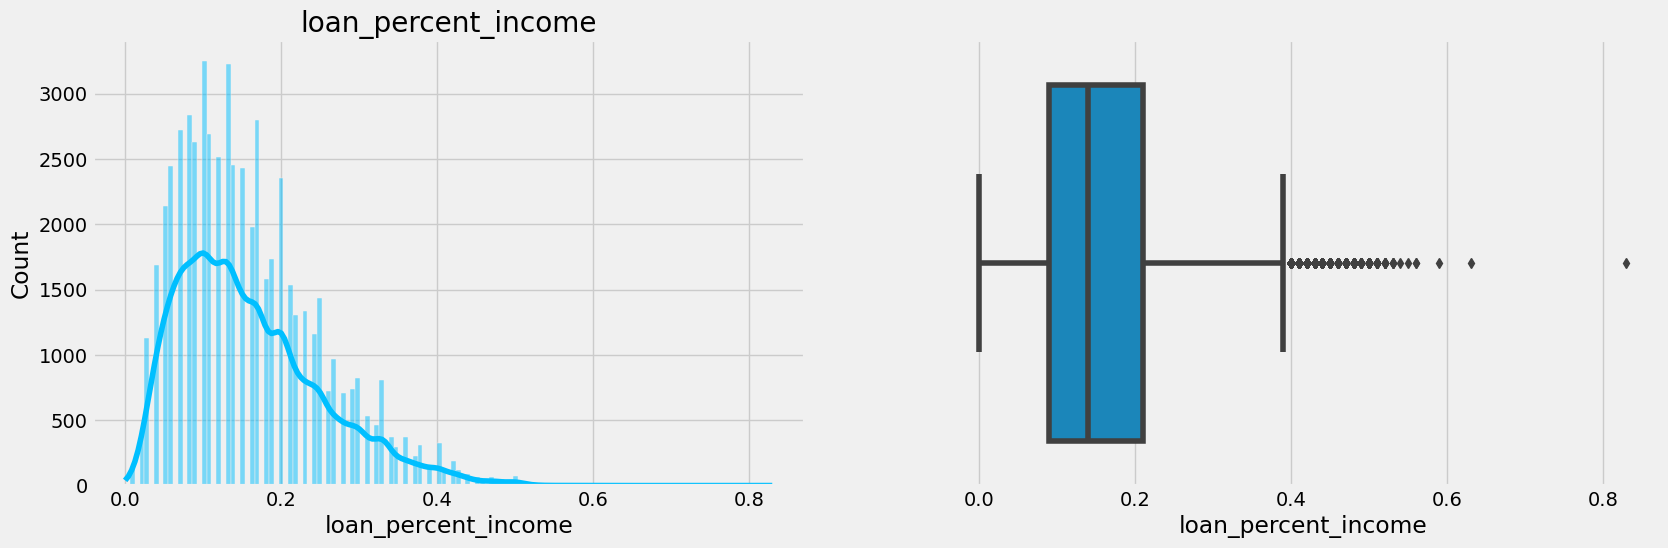

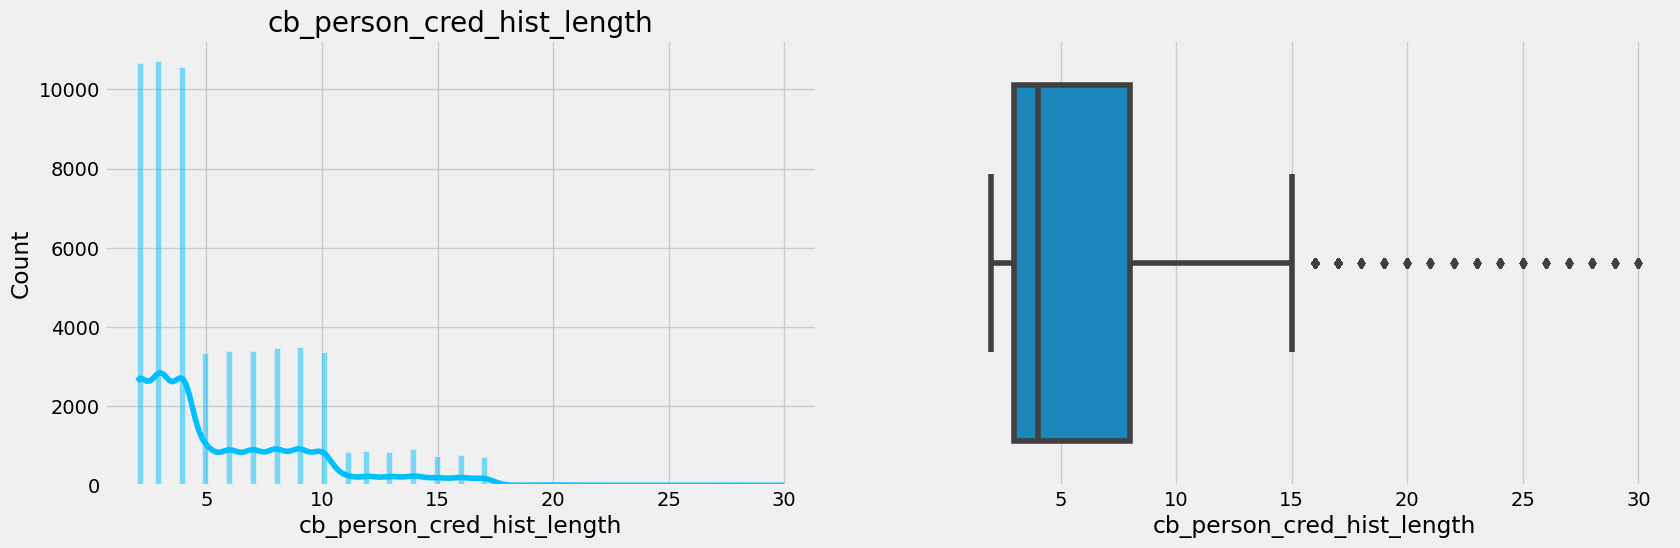

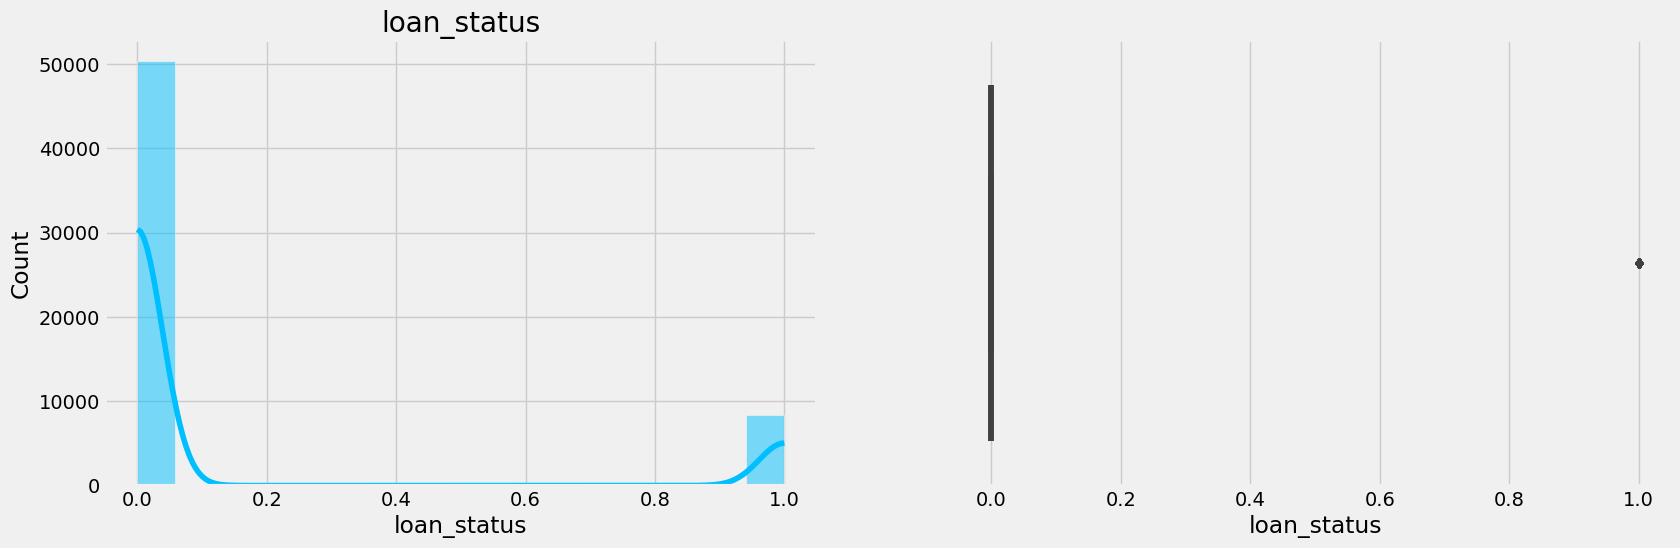

In [78]:
for col in num_cols:
    f, ax=plt.subplots(1,2, figsize=(18, 5.5))
    
    # Distribution plot
    sn.histplot(x=col, data=df, kde=True, color='deepskyblue', ax=ax[0])
    ax[0].set_title(f'{col}')
    
    # Boxplot
    sn.boxplot(x=col, data=df, ax=ax[1])
    
    plt.show()

----------------

## 4) Showing the Categorical columns and then performing analysis

In [79]:
cat_cols=df.select_dtypes(include=['object']).columns

cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

### Checking unique columns of the Categorical values

In [80]:
for col in cat_cols:
    result=df[col].value_counts()
    print(result)
    print("===========================")

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


### ii) Visualizing the Categorical columns using Countplot and Pie Chart

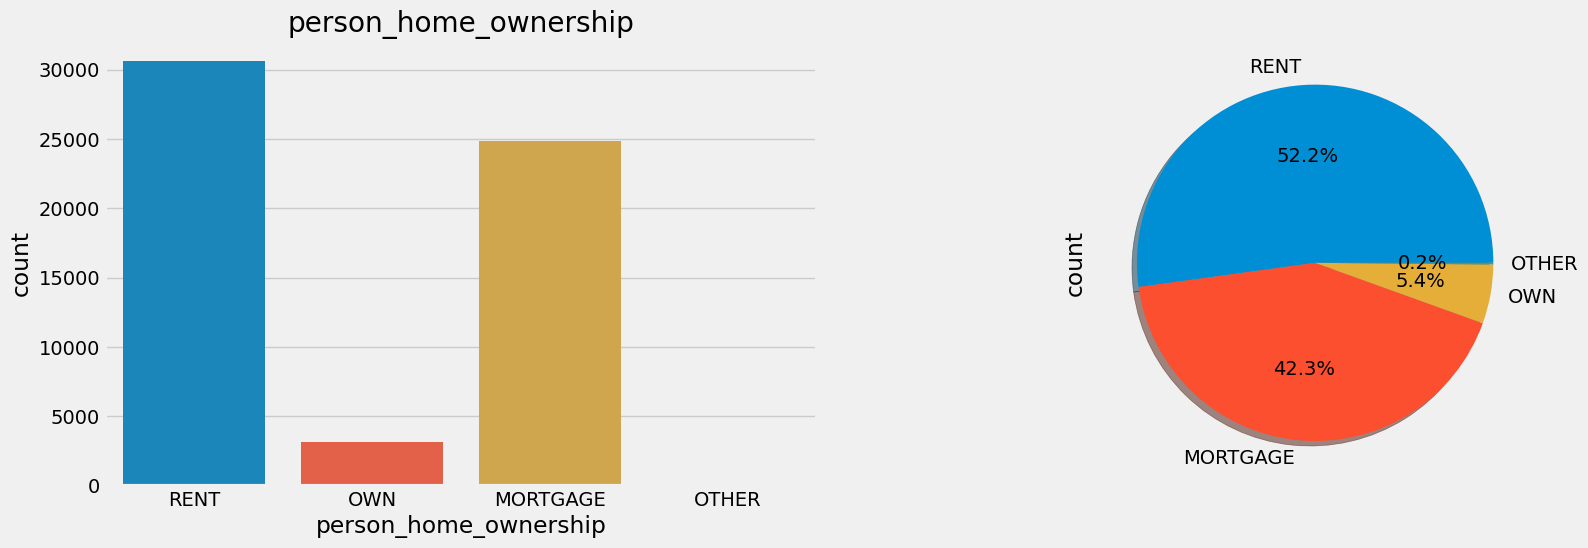

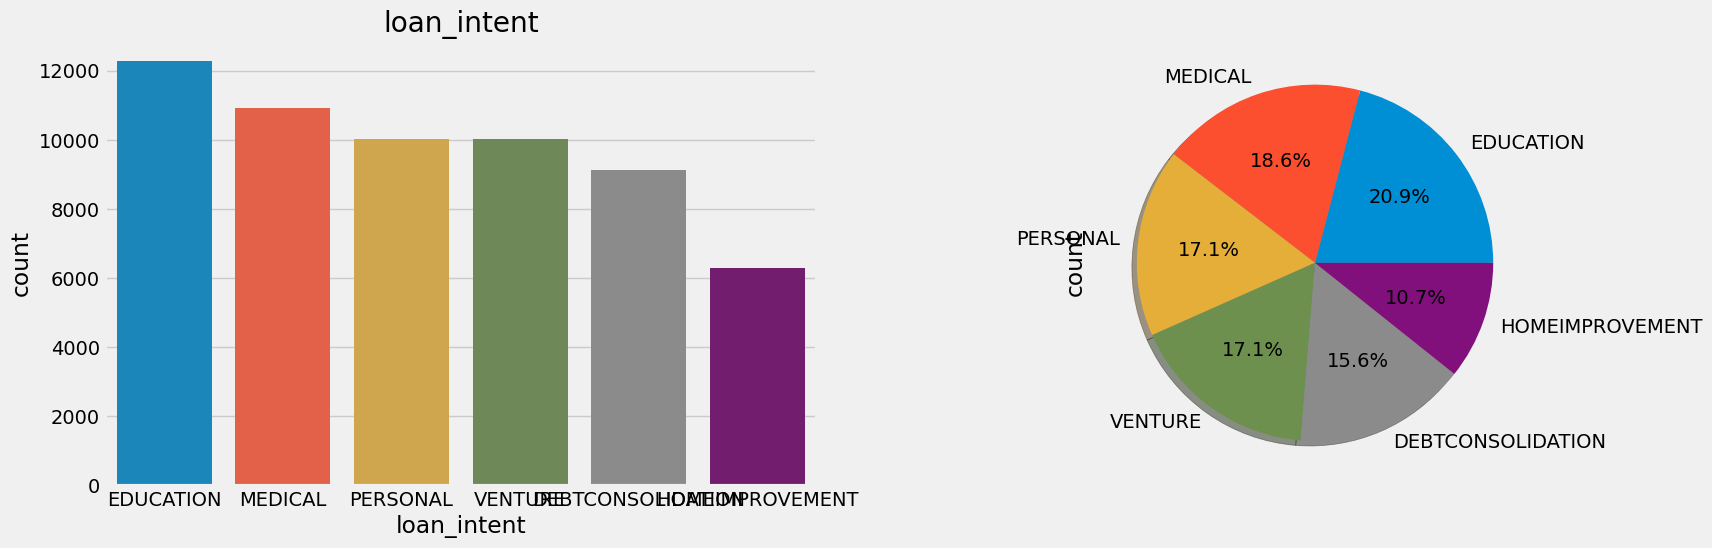

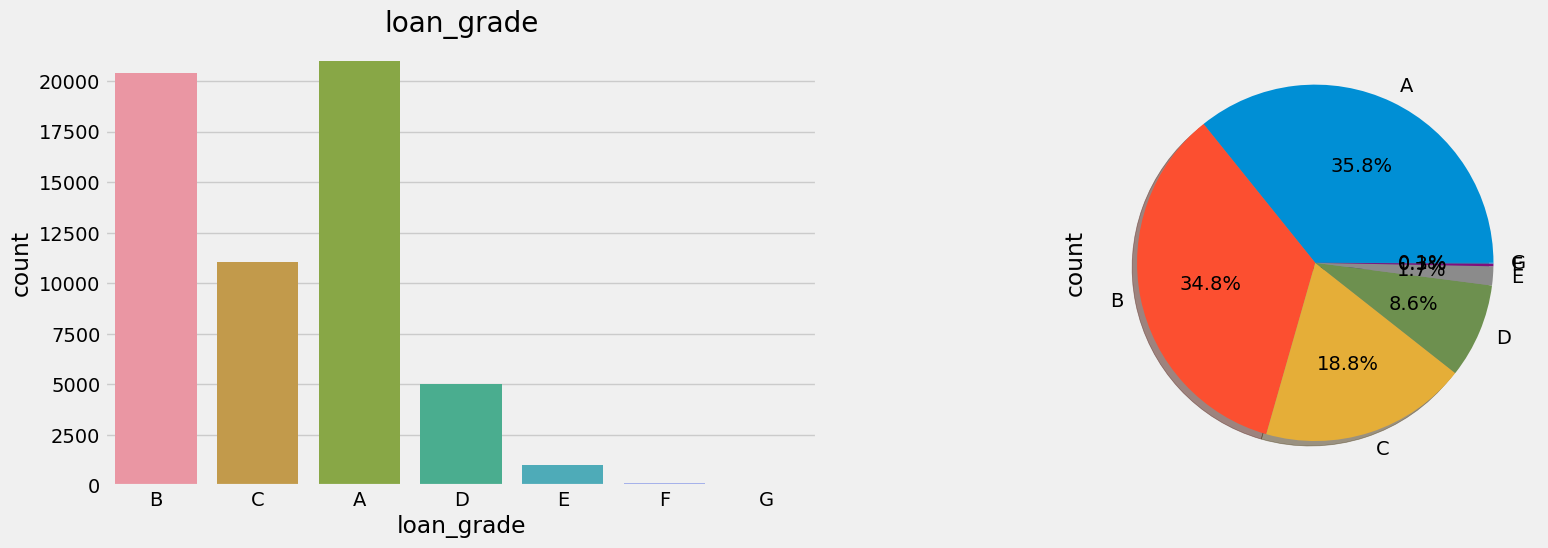

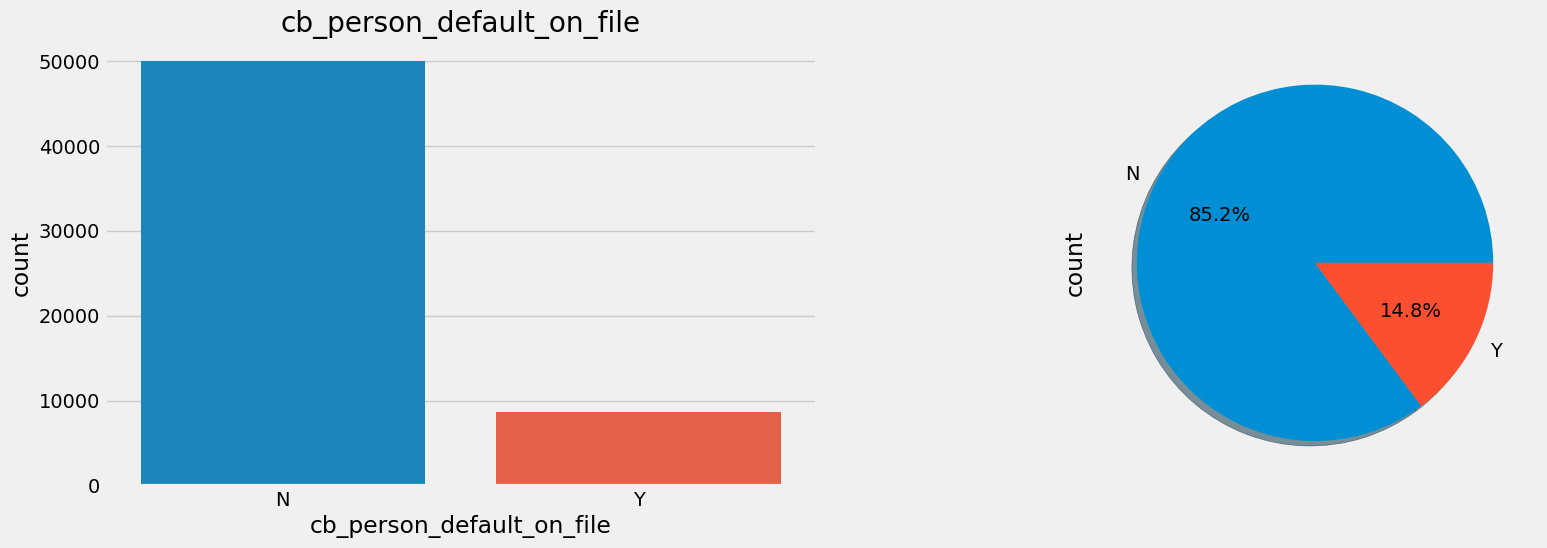

In [81]:
for col in cat_cols:
    
    f, ax=plt.subplots(1,2, figsize=(18,5.5))
    
    # Count plot
    sn.countplot(x=col, data=df, ax=ax[0])
    ax[0].set_title(f'{col}')
    
    # Pie chart
    df[col].value_counts().plot(kind='pie', autopct='%.1f%%', shadow=True, ax=ax[1])
    
    plt.show()

----------

## 5) Showing the Numerical columns with Respect to Labeled Column

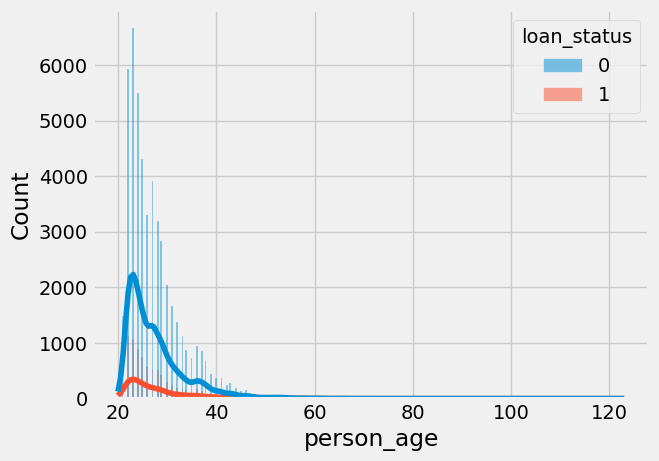

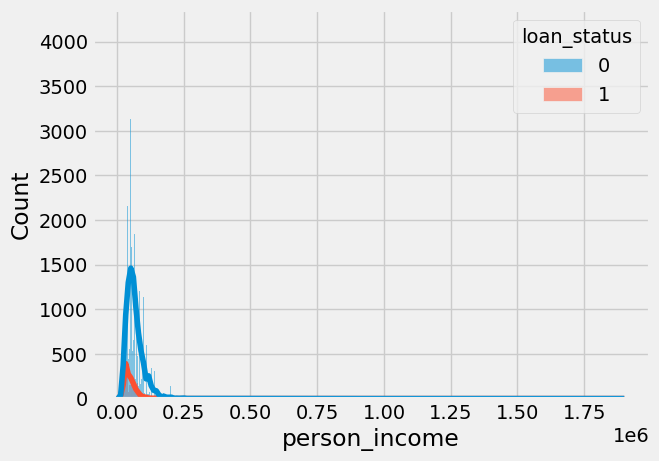

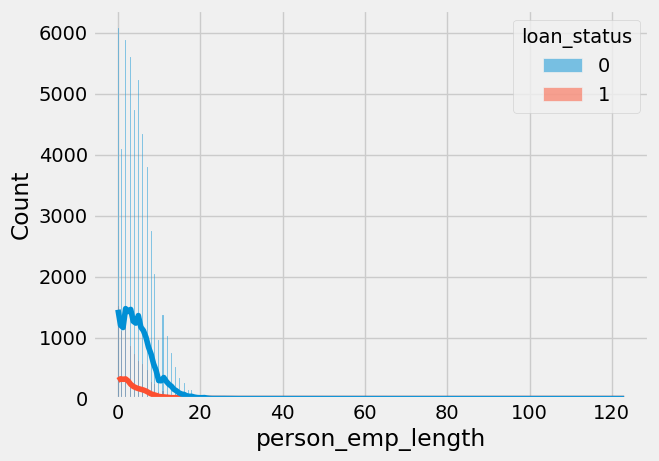

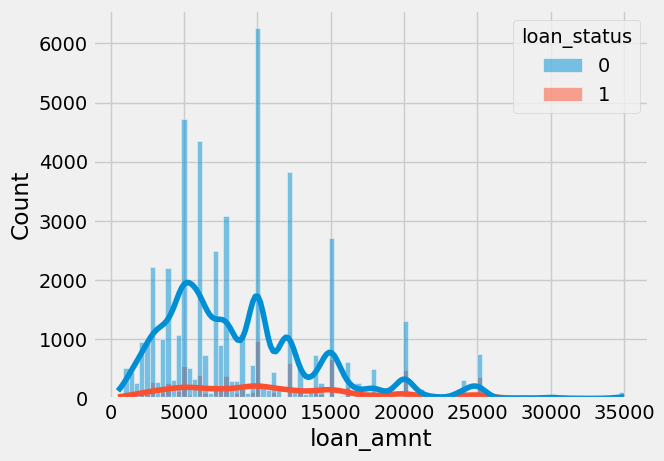

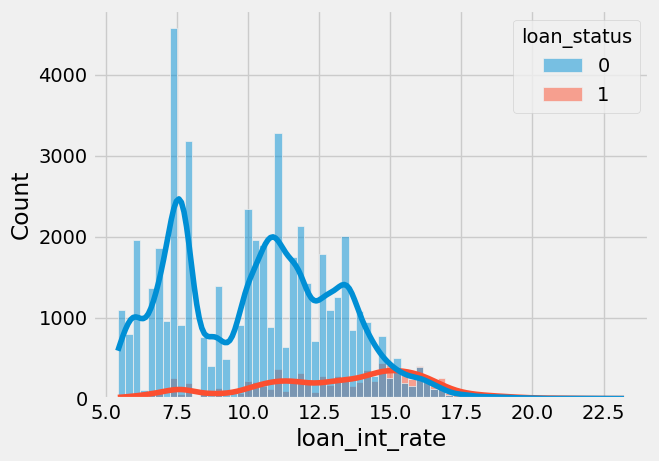

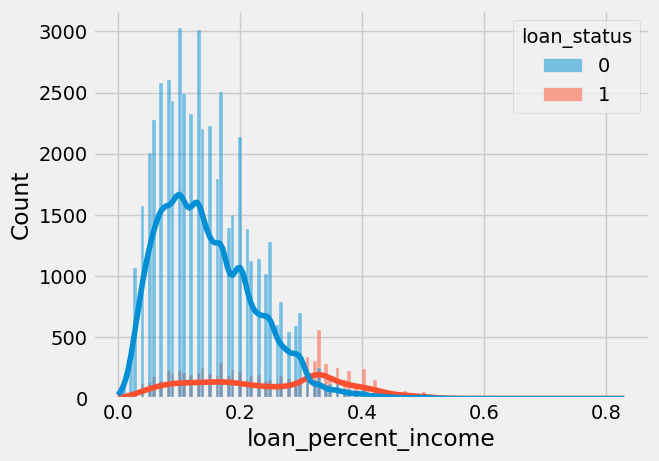

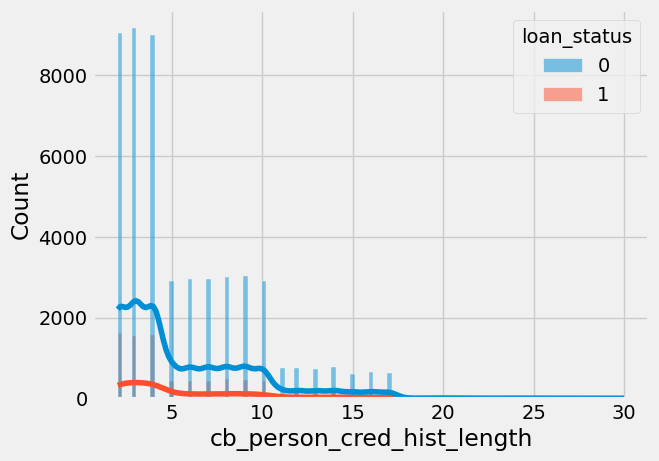

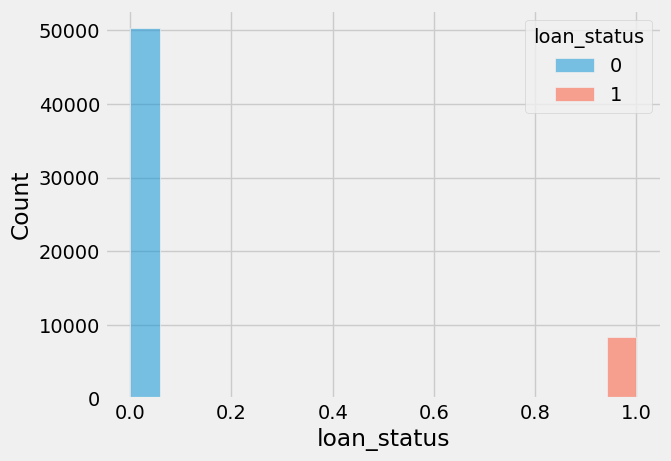

In [82]:
for col in num_cols:
    sn.histplot(x=col, data=df, kde=True, hue='loan_status')
    plt.show()

-------------

## 6) Showing the Categorical columns with Respect to Labeled Column

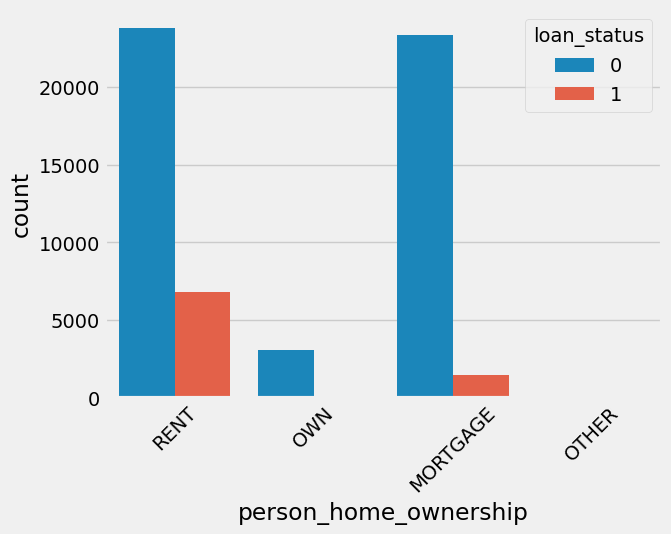

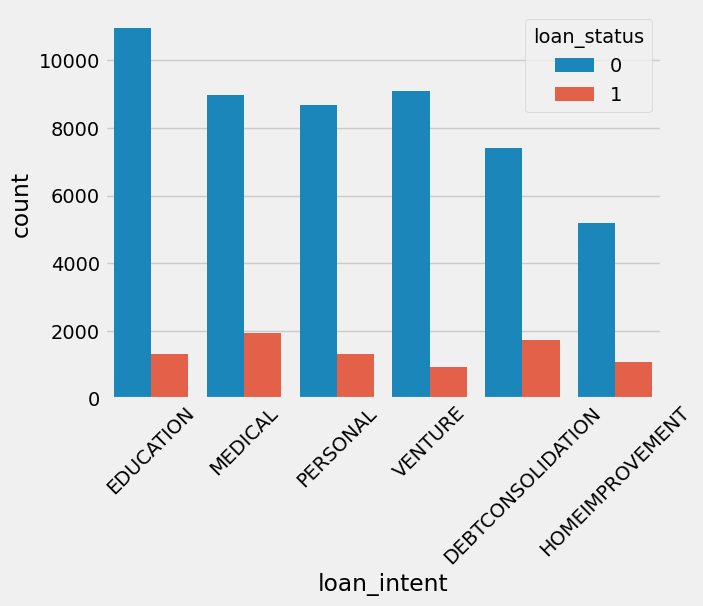

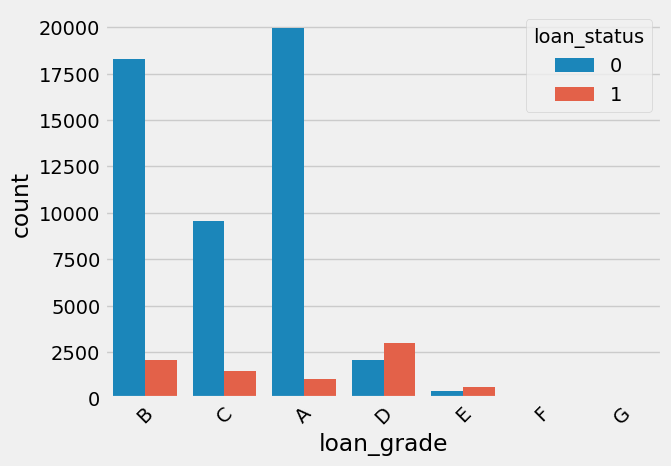

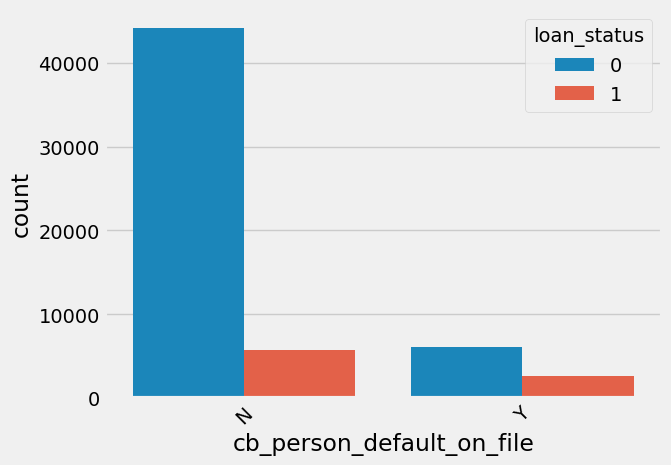

In [83]:
for col in cat_cols:
    sn.countplot(x=col, data=df, hue='loan_status')
    plt.xticks(rotation=45)
    plt.show()

-------------

## 7) Label Encoding for Categorical Columns

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
lb=LabelEncoder()

#### Before label Encoding

In [86]:
for col in cat_cols:
    result=df[col].value_counts()
    print(result)
    print("===========================")

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


#### After Label Encoding

In [87]:
for col in cat_cols:
    df[col]=lb.fit_transform(df[col])

In [88]:
for col in cat_cols:
    result=df[col].value_counts()
    print(result)
    print("===========================")

person_home_ownership
3    30594
0    24824
2     3138
1       89
Name: count, dtype: int64
loan_intent
1    12271
3    10934
4    10016
5    10011
0     9133
2     6280
Name: count, dtype: int64
loan_grade
0    20984
1    20400
2    11036
3     5034
4     1009
5      149
6       33
Name: count, dtype: int64
cb_person_default_on_file
0    49943
1     8702
Name: count, dtype: int64


--------------

## 8) Visualizing the Correlation using Heatmap

<Axes: >

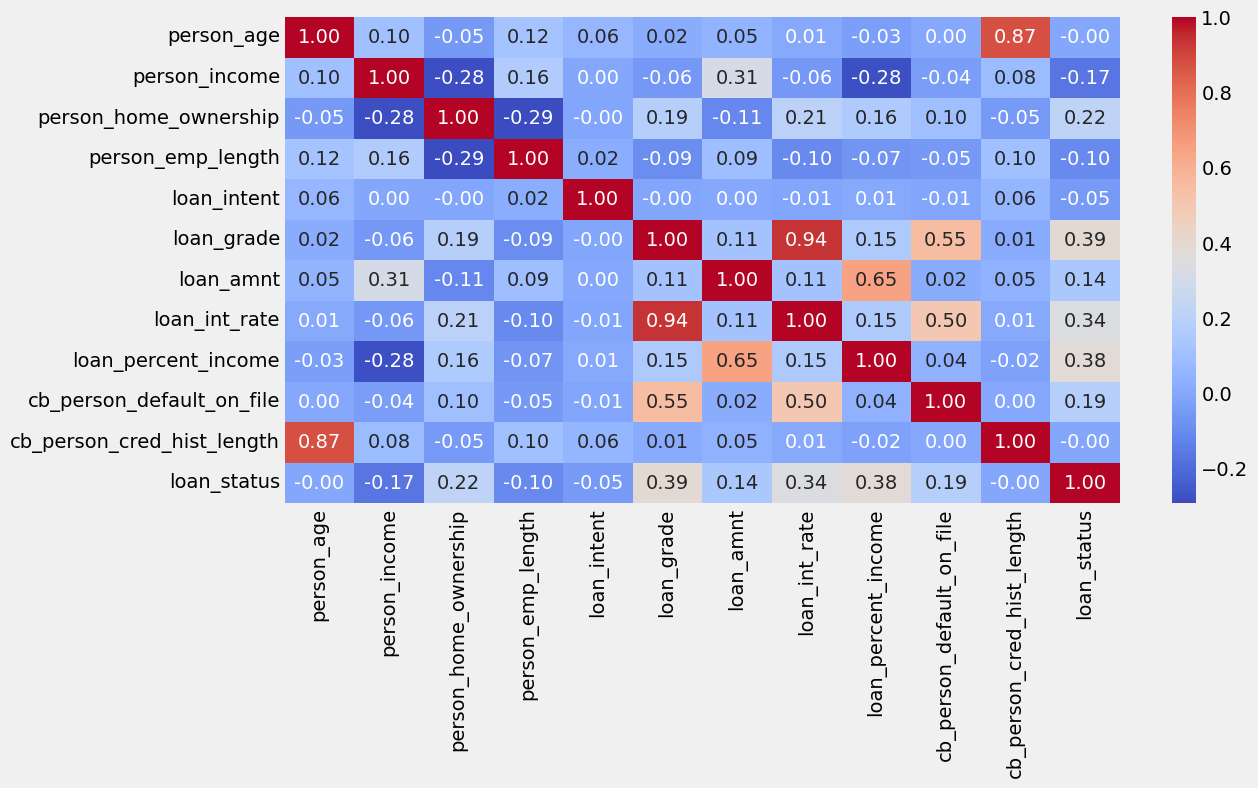

In [89]:
plt.figure(figsize=(12,6))

sn.heatmap(df.corr(), fmt='.2f', annot=True, cmap='coolwarm')

-----

## 9) Visualizing the Correlation with Respect to Labeled Column

<Axes: >

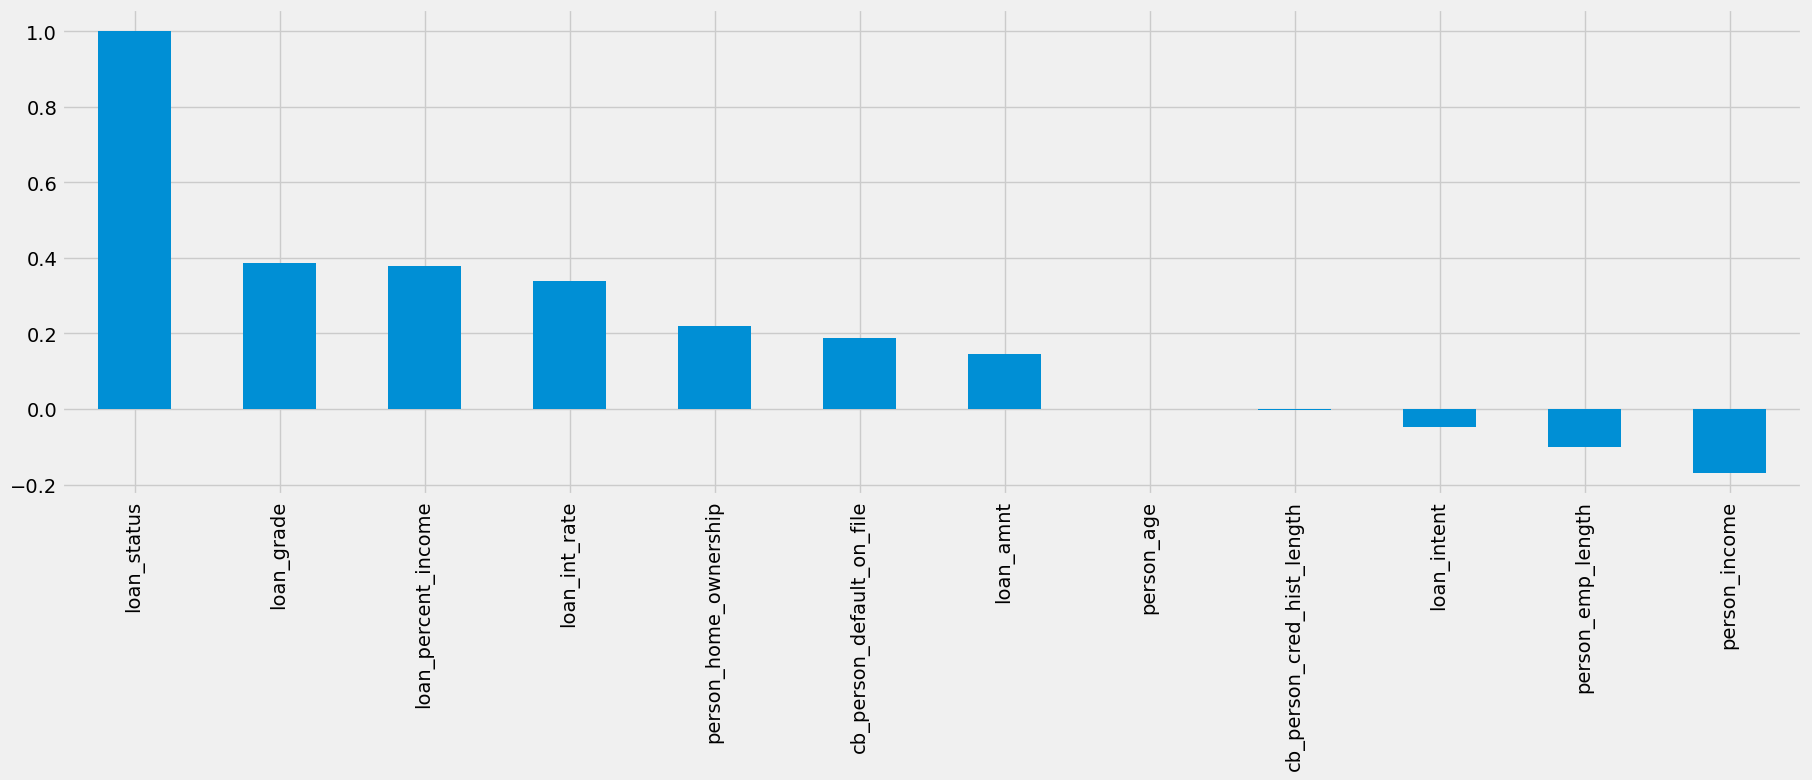

In [90]:
df.corr()['loan_status'].sort_values(ascending=False).plot(kind='bar', figsize=(20,6))

------------------

# Train Test Split

In [91]:
X=df.drop('loan_status',axis=1)
Y=df['loan_status']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=101)

In [94]:
print(X.shape, X_train.shape, X_test.shape)

(58645, 11) (46916, 11) (11729, 11)


------------------------

# Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
sc=StandardScaler()

In [97]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [98]:
X_train

array([[ 0.56949361, -0.91682987,  0.22268896, ...,  0.00503159,
        -0.41648216,  1.03462243],
       [-0.09171287,  0.4191634 , -1.15472372, ..., -0.75751252,
        -0.41648216, -0.20300763],
       [-1.0835226 ,  0.15822722,  0.91139529, ..., -1.08431714,
        -0.41648216, -0.69805965],
       ...,
       [-0.42231612,  0.02775912, -1.15472372, ..., -0.97538227,
        -0.41648216, -0.94558566],
       [-1.0835226 , -0.12880259,  0.91139529, ...,  2.18372904,
        -0.41648216, -0.69805965],
       [ 2.71841468,  0.02775912, -1.15472372, ..., -0.10390329,
        -0.41648216,  2.27225248]])

------------

# Model Training

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [101]:
def metrices_info(model):
    y_pred=model.predict(X_test)
    
    acc=accuracy_score(Y_test, y_pred)
    conf=confusion_matrix(Y_test, y_pred)
    cff=classification_report(Y_test, y_pred)
    
    y1_pred=model.predict(X_train)
    train_acc=accuracy_score(Y_train, y1_pred)
    
    print('Train Accuracy: ', train_acc)
    print('Test Accuracy: ', acc)
    print("==================================")
    
    print('Confusion Matrix: ')
    print(conf)
    print("=========================================")
    print('Classification Report: ')
    print(cff)
    print("======================================================")

-----------

## i) Logistic Regression

In [102]:
Lr=LogisticRegression(max_iter=1000)

Lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### a) Metrices Information

In [103]:
metrices_info(Lr)

Train Accuracy:  0.8954727598260721
Test Accuracy:  0.8989683689999147
Confusion Matrix: 
[[9872  253]
 [ 932  672]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10125
           1       0.73      0.42      0.53      1604

    accuracy                           0.90     11729
   macro avg       0.82      0.70      0.74     11729
weighted avg       0.89      0.90      0.89     11729



### b) ROC Curve

In [115]:
y_pred=Lr.predict_proba(X_test)[:,-1]
roc_curve=roc_auc_score(Y_test, y_pred)

roc_curve

0.8833066100181645

-------------

## ii) Adaboost Classifiar

In [104]:
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train)

AdaBoostClassifier()

### a) Metrices Information

In [105]:
metrices_info(ad)

Train Accuracy:  0.9271037599113309
Test Accuracy:  0.9294910052007844
Confusion Matrix: 
[[9891  234]
 [ 593 1011]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10125
           1       0.81      0.63      0.71      1604

    accuracy                           0.93     11729
   macro avg       0.88      0.80      0.83     11729
weighted avg       0.93      0.93      0.93     11729



### b) ROC Curve

In [116]:
y_pred=ad.predict_proba(X_test)[:,-1]
roc_curve=roc_auc_score(Y_test, y_pred)

roc_curve

0.921243958006219

### c) Feature Importances

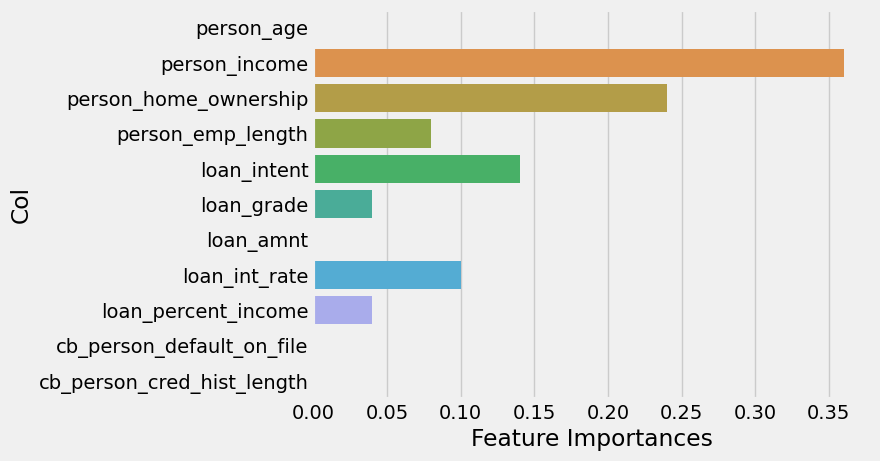

In [148]:
y_pred=ad.predict(X_test)

perform=pd.DataFrame({'Col': X.columns, 'Feature Importances':ad.feature_importances_})


sn.barplot(y='Col', x='Feature Importances', data=perform)

plt.show()

------------

## iii) Gradient Boosting Classifier

In [106]:
gr=GradientBoostingClassifier()

gr.fit(X_train,Y_train)

GradientBoostingClassifier()

### a) Metrices Information

In [107]:
metrices_info(gr)

Train Accuracy:  0.9465214425782249
Test Accuracy:  0.9485037087560747
Confusion Matrix: 
[[10017   108]
 [  496  1108]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10125
           1       0.91      0.69      0.79      1604

    accuracy                           0.95     11729
   macro avg       0.93      0.84      0.88     11729
weighted avg       0.95      0.95      0.95     11729



### b) ROC Curve

In [117]:
y_pred=gr.predict_proba(X_test)[:,-1]
roc_curve=roc_auc_score(Y_test, y_pred)

roc_curve

0.9422448816231028

### c) Feature Importances

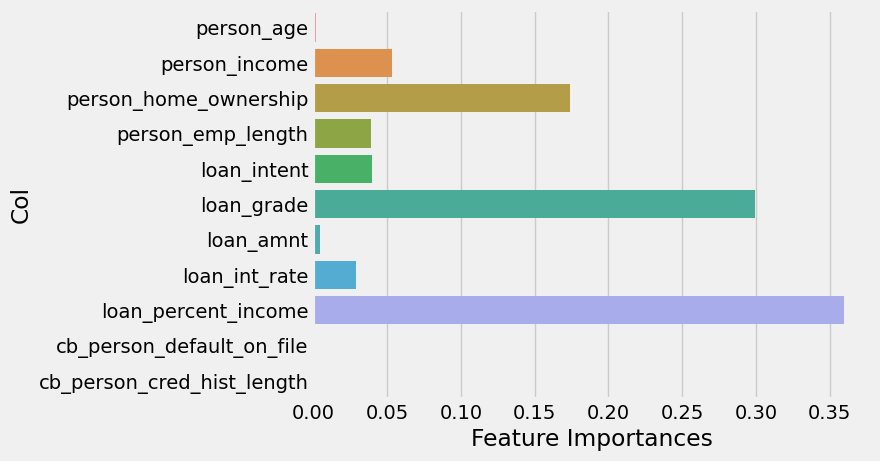

In [149]:
y_pred=ad.predict(X_test)

perform=pd.DataFrame({'Col': X.columns, 'Feature Importances':gr.feature_importances_})


sn.barplot(y='Col', x='Feature Importances', data=perform)

plt.show()

-----------

## iv) XGBoost

In [108]:
xg=XGBClassifier()

xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### a) Metrices Information

In [110]:
metrices_info(xg)

Train Accuracy:  0.9669622303691704
Test Accuracy:  0.9545570807400461
Confusion Matrix: 
[[10018   107]
 [  426  1178]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10125
           1       0.92      0.73      0.82      1604

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### b) ROC Curve

In [118]:
y_pred=xg.predict_proba(X_test)[:,-1]
roc_curve=roc_auc_score(Y_test, y_pred)

roc_curve

0.9562164957975432

### c) Feature Importances

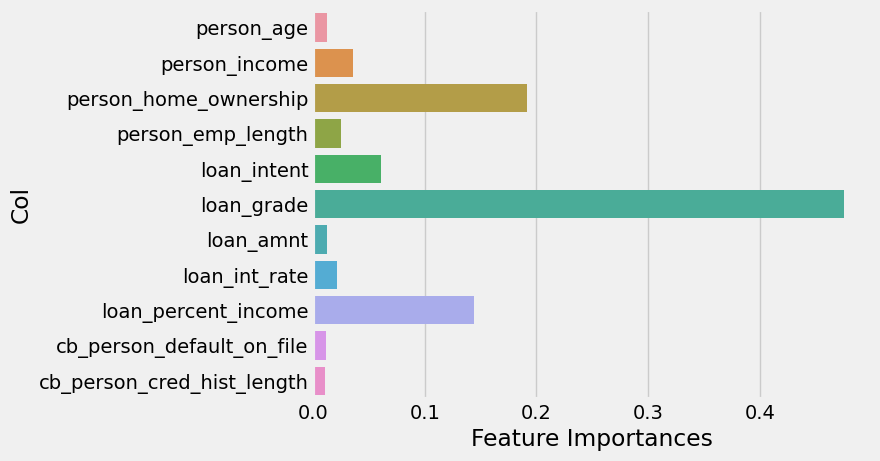

In [150]:
y_pred=ad.predict(X_test)

perform=pd.DataFrame({'Col': X.columns, 'Feature Importances':xg.feature_importances_})


sn.barplot(y='Col', x='Feature Importances', data=perform)

plt.show()

----------------

## v) LGBM

In [111]:
lgm=LGBMClassifier()

lgm.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 6746, number of negative: 40170
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143789 -> initscore=-1.784171
[LightGBM] [Info] Start training from score -1.784171


LGBMClassifier()

### a) Metrices Information

In [112]:
metrices_info(lgm)

Train Accuracy:  0.9562409412567141
Test Accuracy:  0.955239150822747
Confusion Matrix: 
[[10044    81]
 [  444  1160]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10125
           1       0.93      0.72      0.82      1604

    accuracy                           0.96     11729
   macro avg       0.95      0.86      0.89     11729
weighted avg       0.95      0.96      0.95     11729



### b) ROC Curve

In [119]:
y_pred=lgm.predict_proba(X_test)[:,-1]
roc_curve=roc_auc_score(Y_test, y_pred)

roc_curve

0.9595544780025246

### c) Feature Importances

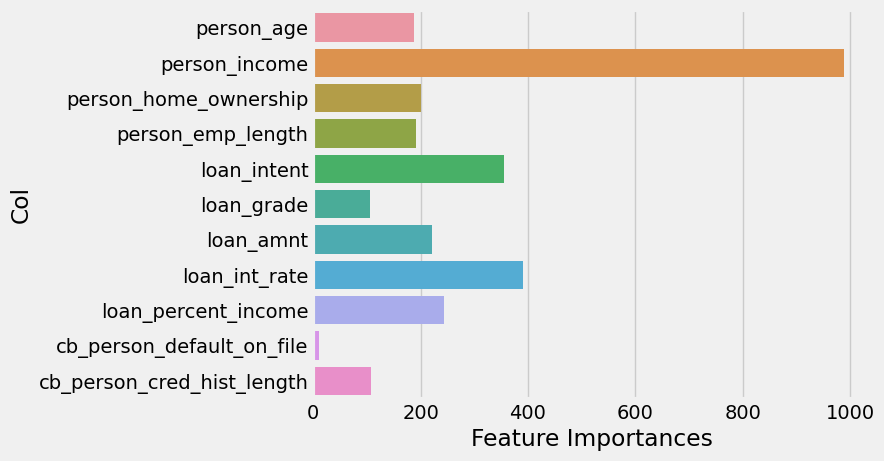

In [151]:
y_pred=ad.predict(X_test)

perform=pd.DataFrame({'Col': X.columns, 'Feature Importances':lgm.feature_importances_})


sn.barplot(y='Col', x='Feature Importances', data=perform)

plt.show()

-----------

## vi) CatBoost

In [113]:
ct=CatBoostClassifier()

ct.fit(X_train,Y_train)

Learning rate set to 0.053283
0:	learn: 0.6240848	total: 63.8ms	remaining: 1m 3s
1:	learn: 0.5644717	total: 73.5ms	remaining: 36.7s
2:	learn: 0.5116624	total: 82.8ms	remaining: 27.5s
3:	learn: 0.4675341	total: 92.5ms	remaining: 23s
4:	learn: 0.4319826	total: 103ms	remaining: 20.4s
5:	learn: 0.4015543	total: 112ms	remaining: 18.5s
6:	learn: 0.3746326	total: 121ms	remaining: 17.2s
7:	learn: 0.3513162	total: 131ms	remaining: 16.3s
8:	learn: 0.3310302	total: 141ms	remaining: 15.6s
9:	learn: 0.3143374	total: 151ms	remaining: 15s
10:	learn: 0.2993906	total: 161ms	remaining: 14.5s
11:	learn: 0.2860830	total: 171ms	remaining: 14.1s
12:	learn: 0.2752167	total: 181ms	remaining: 13.7s
13:	learn: 0.2654170	total: 193ms	remaining: 13.6s
14:	learn: 0.2571730	total: 206ms	remaining: 13.5s
15:	learn: 0.2497885	total: 216ms	remaining: 13.3s
16:	learn: 0.2432748	total: 226ms	remaining: 13.1s
17:	learn: 0.2373534	total: 235ms	remaining: 12.8s
18:	learn: 0.2318604	total: 245ms	remaining: 12.7s
19:	learn: 

### a) Metrices Information

In [114]:
metrices_info(ct)

Train Accuracy:  0.9606530821041862
Test Accuracy:  0.9557507033847727
Confusion Matrix: 
[[10040    85]
 [  434  1170]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10125
           1       0.93      0.73      0.82      1604

    accuracy                           0.96     11729
   macro avg       0.95      0.86      0.90     11729
weighted avg       0.95      0.96      0.95     11729



### b) ROC Curve

In [120]:
y_pred=ct.predict_proba(X_test)[:,-1]
roc_curve=roc_auc_score(Y_test, y_pred)

roc_curve

0.9579135494596841

### c) Feature Importances

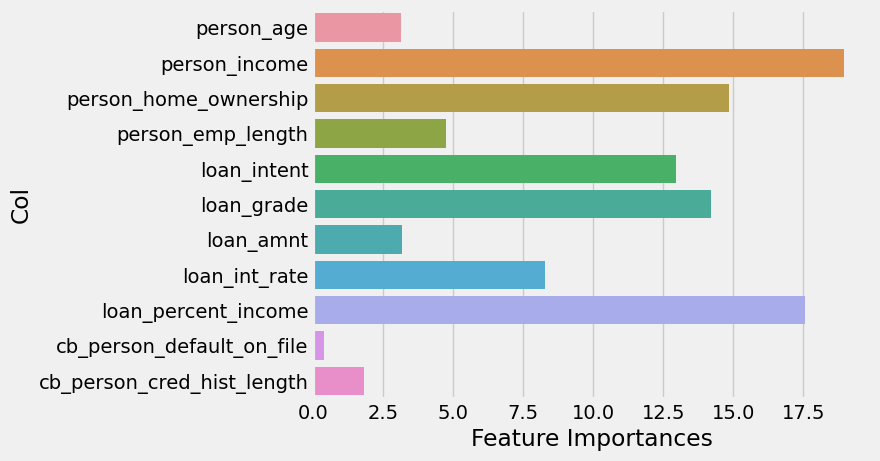

In [152]:
y_pred=ad.predict(X_test)

perform=pd.DataFrame({'Col': X.columns, 'Feature Importances':ct.feature_importances_})


sn.barplot(y='Col', x='Feature Importances', data=perform)

plt.show()

#### Above this we can come into this conclusion that, our model is CatBoost

-----------

# Test Set

In [121]:
test_df=pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

#### Checking the first five rows of test set

In [122]:
test_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [123]:
test_df_copy=test_df.copy()

In [125]:
test_df.shape

(39098, 12)

In [126]:
test_df.drop('id', axis=1, inplace=True)

#### Checking the shape of the test set after removing unnecessary columns

In [127]:
test_df.shape

(39098, 11)

#### Checking the information in test set

In [128]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.3+ MB


#### Checking the null values in test set

In [129]:
test_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### Checking the duplicate values in test set

In [130]:
test_df.duplicated().sum()

0

--------------

### Label Encoding for Categorical Columns

In [132]:
test_cat=test_df.select_dtypes(include=['object']).columns

test_cat

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

#### Before Label Encoding

In [134]:
for col in test_cat:
    result=test_df[col].value_counts()
    print(result)
    print("===========================")

person_home_ownership
RENT        20280
MORTGAGE    16683
OWN          2056
OTHER          79
Name: count, dtype: int64
loan_intent
EDUCATION            8076
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
DEBTCONSOLIDATION    5915
HOMEIMPROVEMENT      4213
Name: count, dtype: int64
loan_grade
A    14005
B    13604
C     7460
D     3269
E      637
F      105
G       18
Name: count, dtype: int64
cb_person_default_on_file
N    33227
Y     5871
Name: count, dtype: int64


In [135]:
for col in test_cat:
    test_df[col]=lb.fit_transform(test_df[col])

#### After Label Encoding

In [136]:
for col in test_cat:
    result=test_df[col].value_counts()
    print(result)
    print("===========================")

person_home_ownership
3    20280
0    16683
2     2056
1       79
Name: count, dtype: int64
loan_intent
1    8076
3    7447
4    6815
5    6632
0    5915
2    4213
Name: count, dtype: int64
loan_grade
0    14005
1    13604
2     7460
3     3269
4      637
5      105
6       18
Name: count, dtype: int64
cb_person_default_on_file
0    33227
1     5871
Name: count, dtype: int64


-------------

## Scaling the dataset

In [137]:
test_df=sc.transform(test_df)

----------

# Prediction

In [138]:
y_pred=ct.predict(test_df)

In [139]:
y_pred_ct=ct.predict_proba(test_df)[:,1]

In [141]:
sub=pd.DataFrame({'id': test_df_copy['id'], 'loan_status':y_pred_ct})

In [142]:
sub

,id,loan_status
0,58645,0.999161
1,58646,0.016765
2,58647,0.440643
3,58648,0.013304
4,58649,0.073960
...,...,...
39093,97738,0.044939
39094,97739,0.004182
39095,97740,0.006781
39096,97741,0.111143


----

# Kaggle Submission

In [143]:
sub.to_csv('submission_1.csv', index=False)

------------

# Saving the Model

In [153]:
import pickle

In [154]:
pickle.dump(ct, open('CatBoost.pkl', 'wb'))
pickle.dump(sc, open('Scaler.pkl', 'wb'))
pickle.dump(lb, open('LabelEncoder.pkl', 'wb'))

----------

# Prediction

In [155]:
X.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

## Prediction Function

In [156]:
def prediction_results(person_age, person_income, person_home_ownership,person_emp_length, loan_intent, loan_grade, 
                       loan_amnt,loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length,
                      sc,ct):
    
    features=np.array([[person_age, person_income, person_home_ownership,person_emp_length, loan_intent, loan_grade, 
                       loan_amnt,loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]])
    
    scaled_features=sc.transform(features)
    
    result=ct.predict(scaled_features)
    
    return result

### a) Test Case 1

In [159]:
person_age=27
person_income=50000 
person_home_ownership=3
person_emp_length= 1.0
loan_intent=3
loan_grade=2
loan_amnt=12000
loan_int_rate= 13.49
loan_percent_income=0.24 
cb_person_default_on_file=0 
cb_person_cred_hist_length=6

result=prediction_results(person_age, person_income, person_home_ownership,person_emp_length, loan_intent, loan_grade, 
                          loan_amnt,loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length,
                         sc,ct)

if result==0:
    print("Loan Approval Rejected")
else:
    print("Loan Approval Accepted")

Loan Approval Rejected


### b) Test Case 2

In [163]:
person_age=33
person_income=30000 
person_home_ownership=3
person_emp_length= 2.0
loan_intent=1
loan_grade=1
loan_amnt=15000
loan_int_rate= 10.99
loan_percent_income=0.5
cb_person_default_on_file=0 
cb_person_cred_hist_length=7

result=prediction_results(person_age, person_income, person_home_ownership,person_emp_length, loan_intent, loan_grade, 
                          loan_amnt,loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length,
                         sc,ct)

if result==0:
    print("Loan Approval Rejected")
else:
    print("Loan Approval Accepted")

Loan Approval Accepted


-----------